In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

alldata = "owid-covid-data.csv"
testing = "covid-19-testing-policy.csv"
contact = "covid-contact-tracing.csv"
face = "face-covering-policies-covid.csv"
school = "school-closures-covid.csv"
work = "workplace-closures-covid.csv"

data = pd.read_csv(alldata)
testingpd = pd.read_csv(testing)
contactpd = pd.read_csv(contact)
facepd = pd.read_csv(face)
schoolpd = pd.read_csv(school)
workpd = pd.read_csv(work)

# combining testing & contact set
testcont = pd.merge(testingpd, contactpd, how = 'left', 
                    on=['Entity','Code','Day'])
# Replacing nas with 0 
testcont["contact_tracing"]= testcont["contact_tracing"].fillna(0)

# combining school & workplace sets
schoolwork = pd.merge(workpd, schoolpd,how = 'left', on=['Entity','Code','Day'])

# Replacing nas with 0 
schoolwork["school_closures"] = schoolwork["school_closures"].fillna(0).astype(int)


df_covid1 = pd.merge(testcont, schoolwork, how='left', on=['Entity', 'Code', 'Day'])
df_covid = pd.merge(facepd, df_covid1, how='left', on=['Entity', 'Code', 'Day'])

data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77544,ZWE,Africa,Zimbabwe,2021-03-22,36684.0,19.0,25.714,1514.0,2.0,1.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
77545,ZWE,Africa,Zimbabwe,2021-03-23,36717.0,33.0,26.000,1516.0,2.0,1.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
77546,ZWE,Africa,Zimbabwe,2021-03-24,36749.0,32.0,28.143,1516.0,0.0,1.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
77547,ZWE,Africa,Zimbabwe,2021-03-25,36778.0,29.0,23.857,1518.0,2.0,1.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [2]:
is_norway = df_covid['Entity'] == 'Norway'
is_finland = df_covid['Entity'] == 'Finland'
is_denmark = df_covid['Entity'] == 'Denmark'
is_ireland = df_covid['Entity'] == 'Ireland'
is_slovakia = df_covid['Entity'] == 'Slovakia'

In [3]:
df_norway = df_covid[is_norway]
df_finland = df_covid[is_finland]
df_denmark = df_covid[is_denmark]
df_ireland = df_covid[is_ireland]
df_slovakia = df_covid[is_slovakia]

norfin = pd.concat([df_norway, df_finland], ignore_index=True)
denmire = pd.concat([df_denmark, df_ireland], ignore_index=True)
denmire_norfin = pd.concat([denmire, norfin], ignore_index=True)
df_eu = pd.concat([denmire_norfin, df_slovakia], ignore_index=True)
#df_eu

df_norway

,Entity,Code,Day,facial_coverings,testing_policy,contact_tracing,workplace_closures,school_closures
54621,Norway,NOR,2020-01-01,0,0.0,0.0,0.0,0.0
54622,Norway,NOR,2020-01-02,0,0.0,0.0,0.0,0.0
54623,Norway,NOR,2020-01-03,0,0.0,0.0,0.0,0.0
54624,Norway,NOR,2020-01-04,0,0.0,0.0,0.0,0.0
54625,Norway,NOR,2020-01-05,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
55066,Norway,NOR,2021-03-21,2,2.0,2.0,3.0,2.0
55067,Norway,NOR,2021-03-22,2,2.0,2.0,3.0,2.0
55068,Norway,NOR,2021-03-23,2,2.0,2.0,3.0,2.0
55069,Norway,NOR,2021-03-24,2,2.0,2.0,3.0,2.0


<AxesSubplot:>

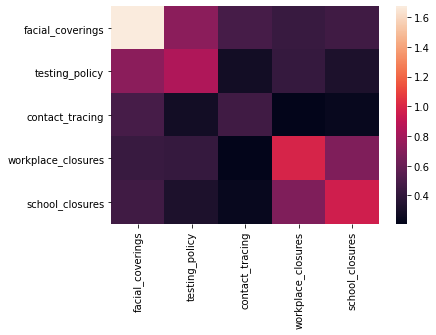

In [4]:
import seaborn as sns
cov = df_eu.cov()
sns.heatmap(cov)

<AxesSubplot:>

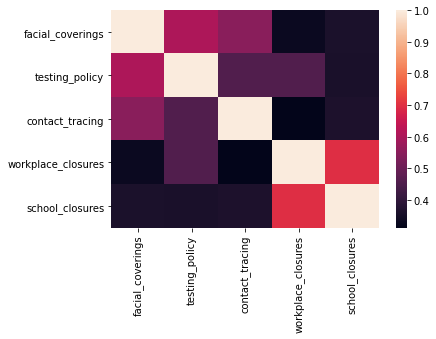

In [5]:
corr = df_eu.corr()
sns.heatmap(corr)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# filter data for dates and state
df_date = df_eu['Day']
df_work = df_eu['workplace_closures']
df_school = df_eu['school_closures']
df_testing = df_eu['testing_policy']
df_contact = df_eu['contact_tracing']
df_face = df_eu['facial_coverings']


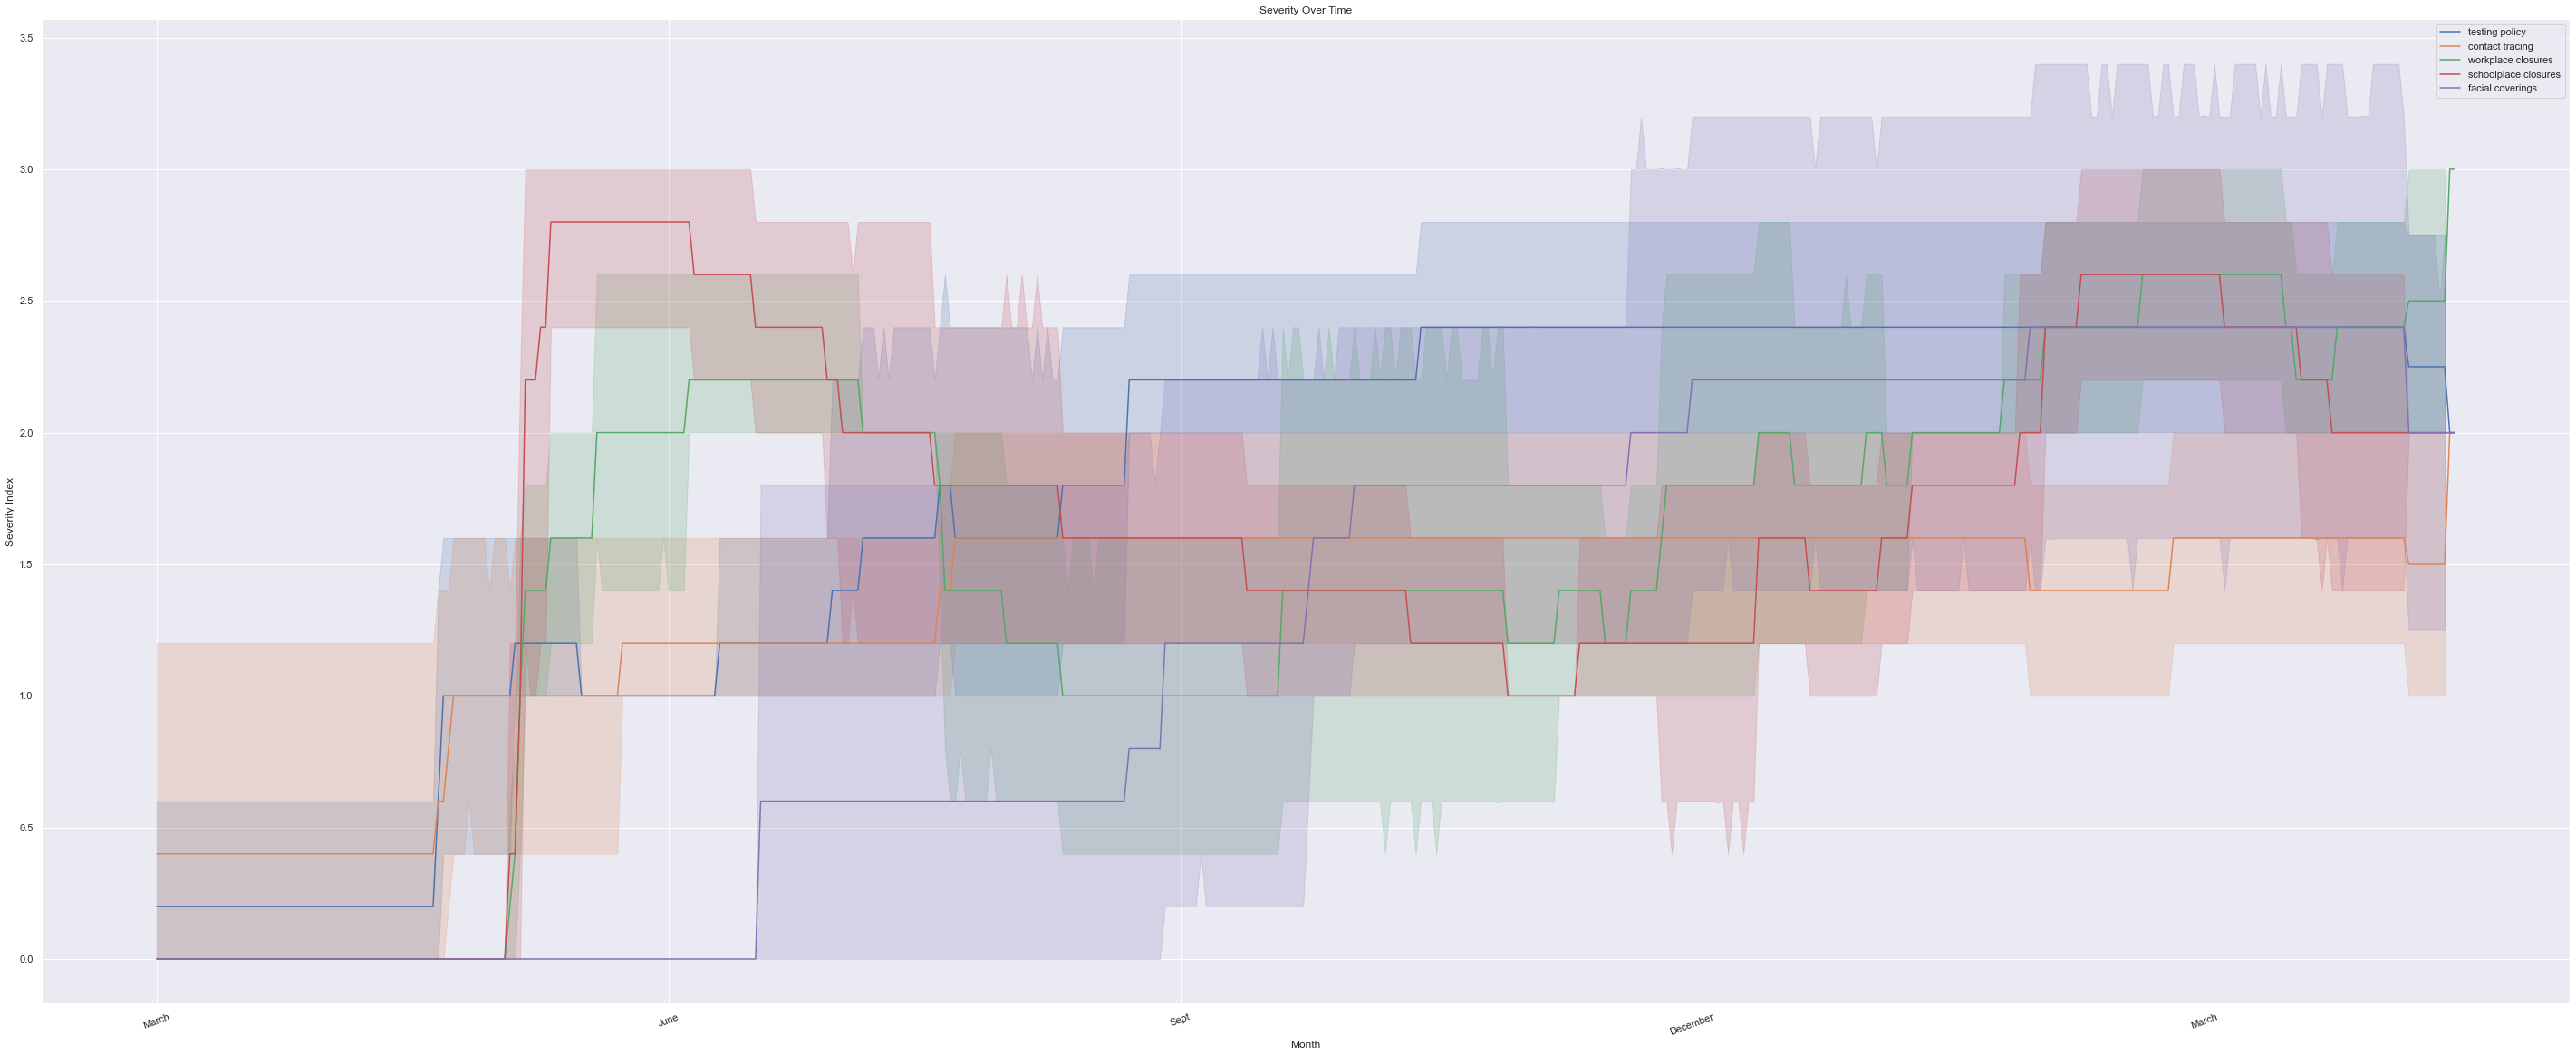

In [19]:
sns.set()
sns.lineplot(x=df_date, y=df_testing, label='testing policy')
sns.lineplot(x=df_date, y=df_contact, label='contact tracing')
sns.lineplot(x=df_date, y=df_work, label='workplace closures')
sns.lineplot(x=df_date, y=df_school, label='schoolplace closures')
sns.lineplot(x=df_date, y=df_face, label='facial coverings')
plt.ylabel('Severity Index')
plt.xlabel('Month')
plt.xticks([0, 100, 200, 300, 400], ['March', 'June','Sept','December','March'], rotation=20)
plt.title('Severity Over Time')
plt.gcf().set_size_inches(50,20)
sns.set()

In [8]:
data = data.fillna(0)
df_data = data[['location','iso_code','date', 'total_cases', 'new_cases']]
df_data.columns = ['Entity','Code', 'Day', 'total_cases', 'new_cases']
df_eu_covid = pd.merge(df_data, df_eu, how='right', on=['Entity','Code','Day'])

df_eu_covid['total_cases'] = df_eu_covid['total_cases'].fillna(0)
df_eu_covid['new_cases'] = df_eu_covid['new_cases'].fillna(0)
df_eu_covid

,Entity,Code,Day,total_cases,new_cases,facial_coverings,testing_policy,contact_tracing,workplace_closures,school_closures
0,Denmark,DNK,2020-01-01,0.0,0.0,0,0.0,0.0,0.0,0.0
1,Denmark,DNK,2020-01-02,0.0,0.0,0,0.0,0.0,0.0,0.0
2,Denmark,DNK,2020-01-03,0.0,0.0,0,0.0,0.0,0.0,0.0
3,Denmark,DNK,2020-01-04,0.0,0.0,0,0.0,0.0,0.0,0.0
4,Denmark,DNK,2020-01-05,0.0,0.0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2229,Slovakia,SVK,2021-03-11,331571.0,1978.0,4,3.0,2.0,2.0,3.0
2230,Slovakia,SVK,2021-03-12,333872.0,2301.0,4,3.0,2.0,2.0,3.0
2231,Slovakia,SVK,2021-03-13,336235.0,2363.0,4,3.0,2.0,2.0,3.0
2232,Slovakia,SVK,2021-03-14,337503.0,1268.0,4,3.0,2.0,2.0,3.0


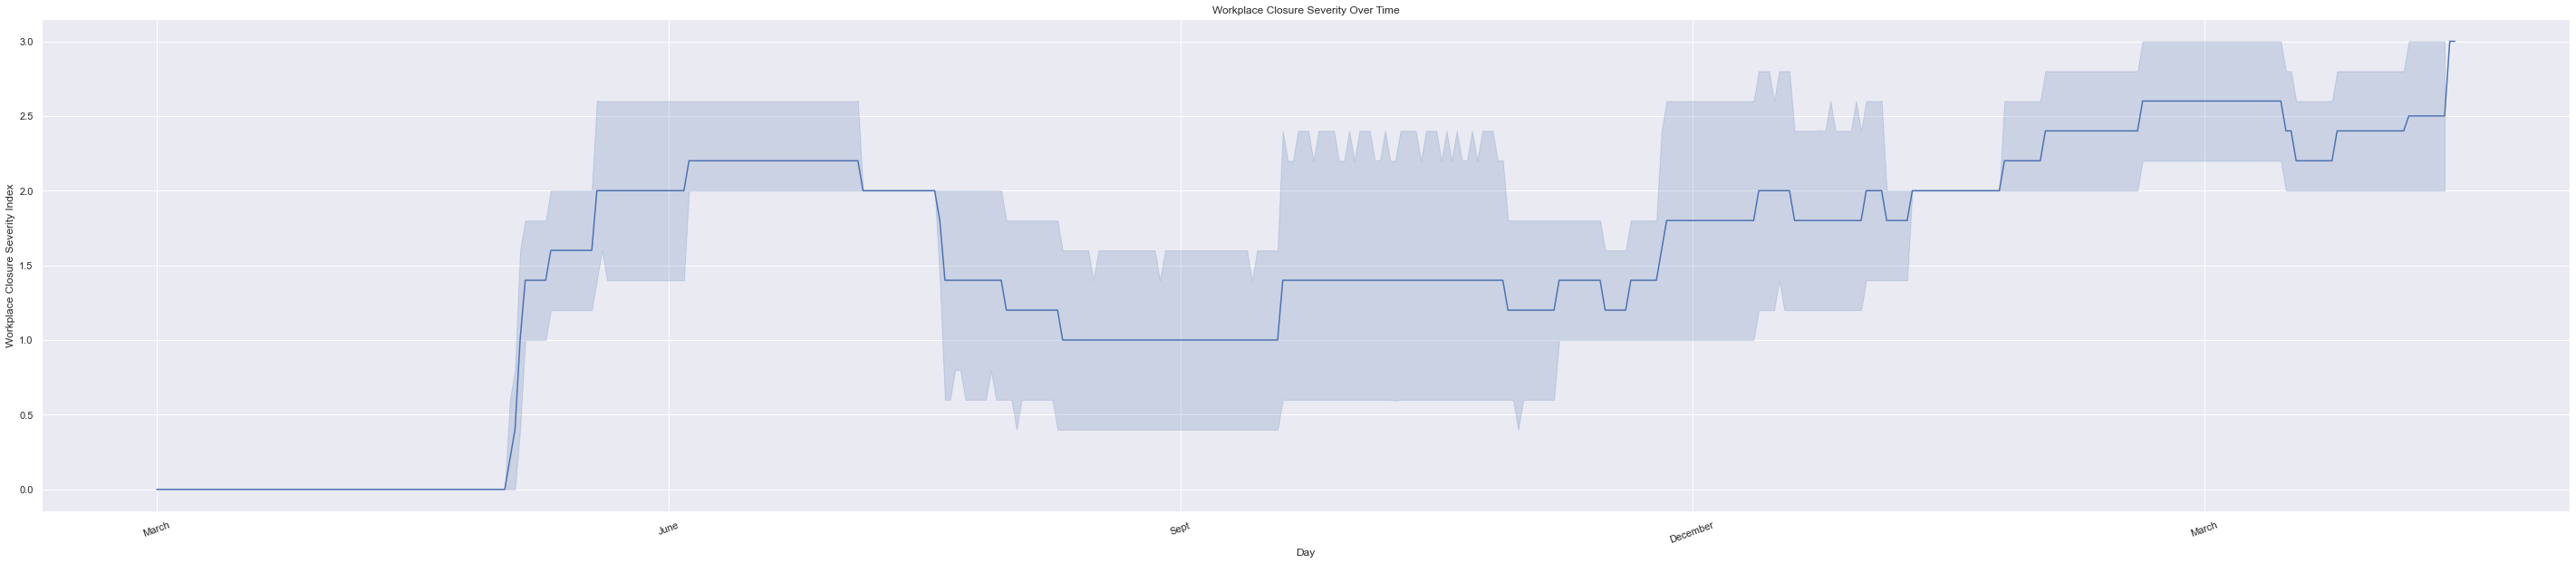

In [24]:
sns.lineplot(x=df_date, y=df_work)
plt.ylabel('Workplace Closure Severity Index')
plt.xlabel('Day')
plt.title('Workplace Closure Severity Over Time')
plt.gcf().set_size_inches(50,10)
plt.xticks([0, 100, 200, 300, 400], ['March', 'June','Sept','December','March'], rotation=20)
sns.set()

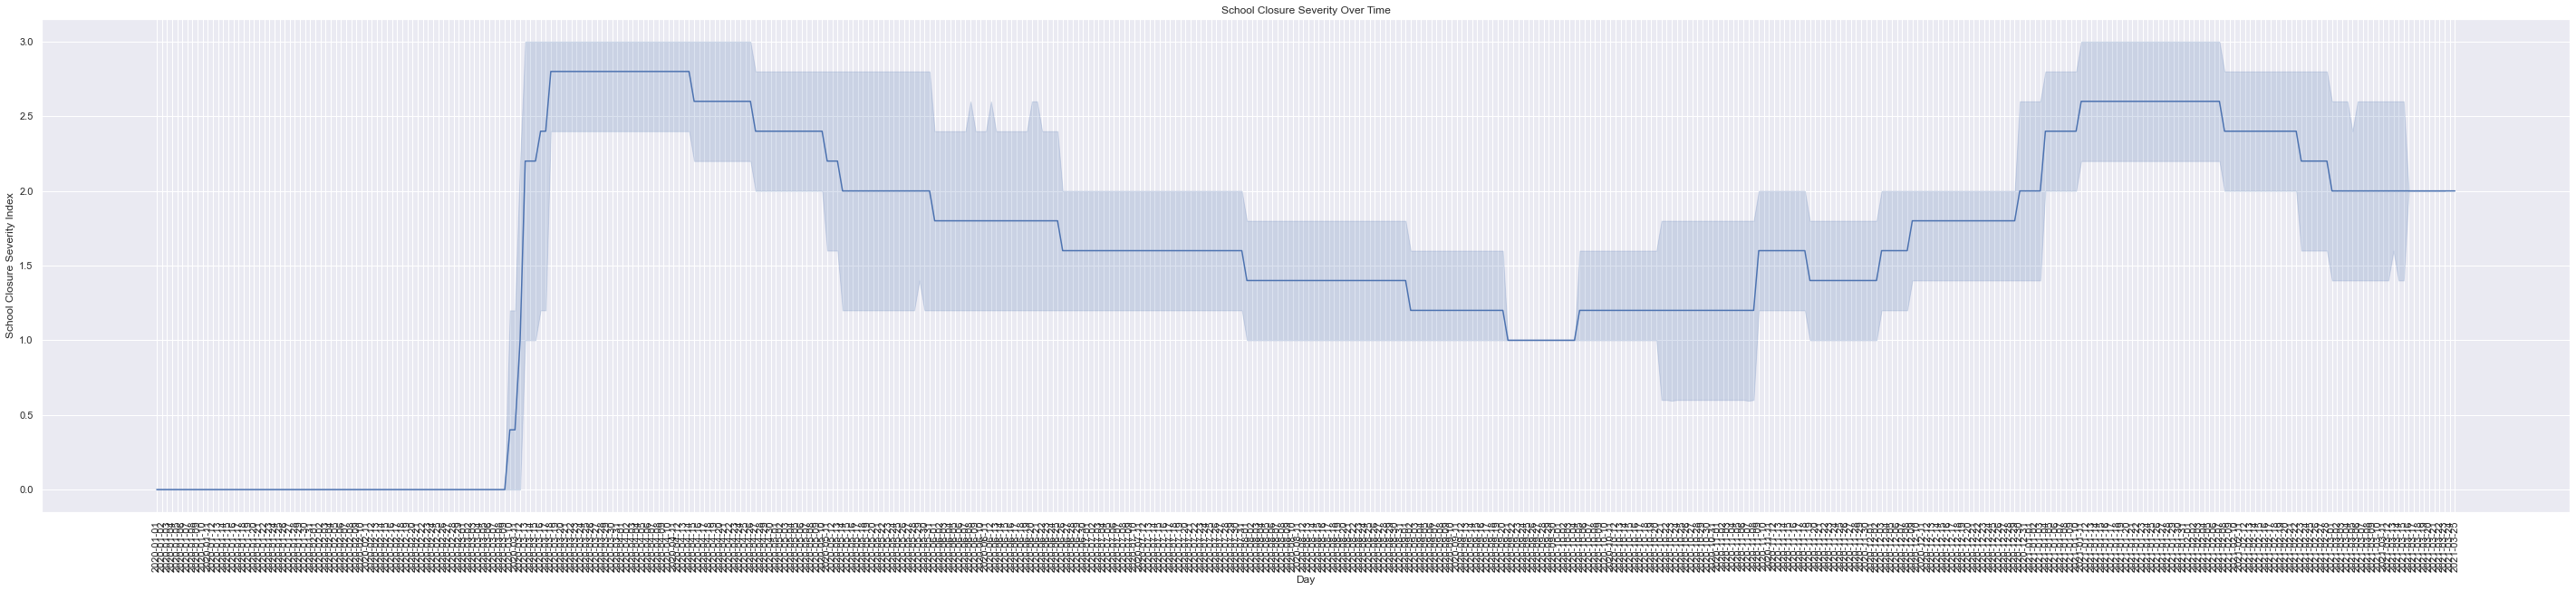

In [25]:
sns.lineplot(x=df_date, y=df_school)
plt.ylabel('School Closure Severity Index')
plt.xticks(rotation=90)
plt.title('School Closure Severity Over Time')
plt.gcf().set_size_inches(50,10)
sns.set()

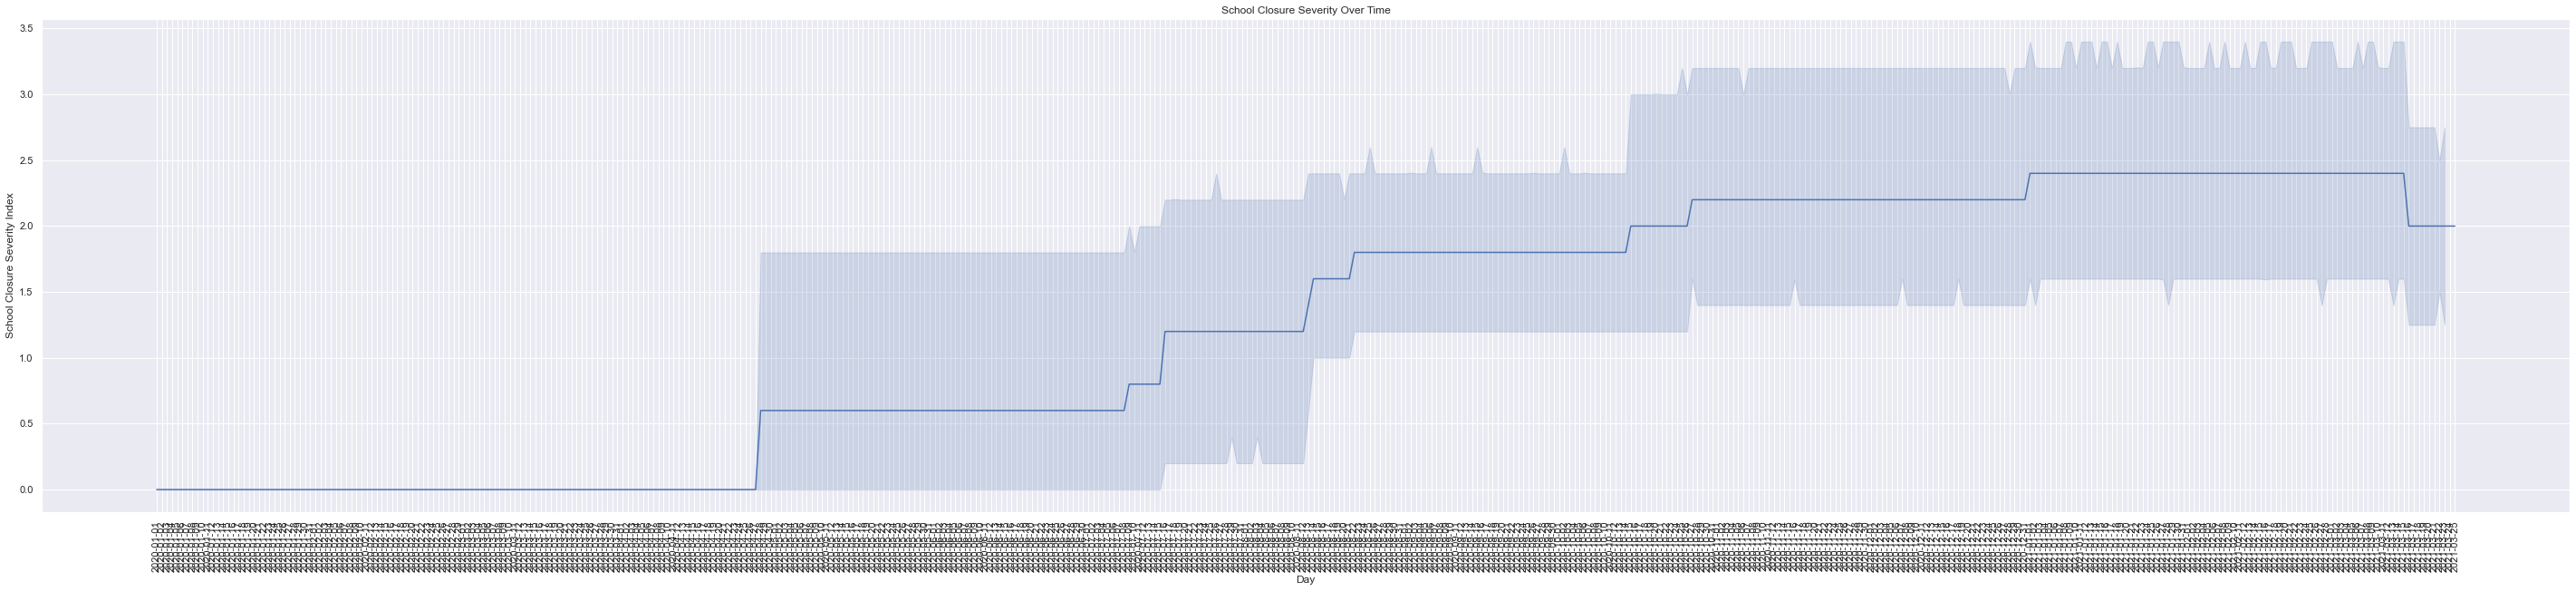

In [26]:
sns.lineplot(x=df_date, y=df_face)
plt.ylabel('School Closure Severity Index')
plt.xticks(rotation=90)
plt.title('School Closure Severity Over Time')
plt.gcf().set_size_inches(50,10)
sns.set()

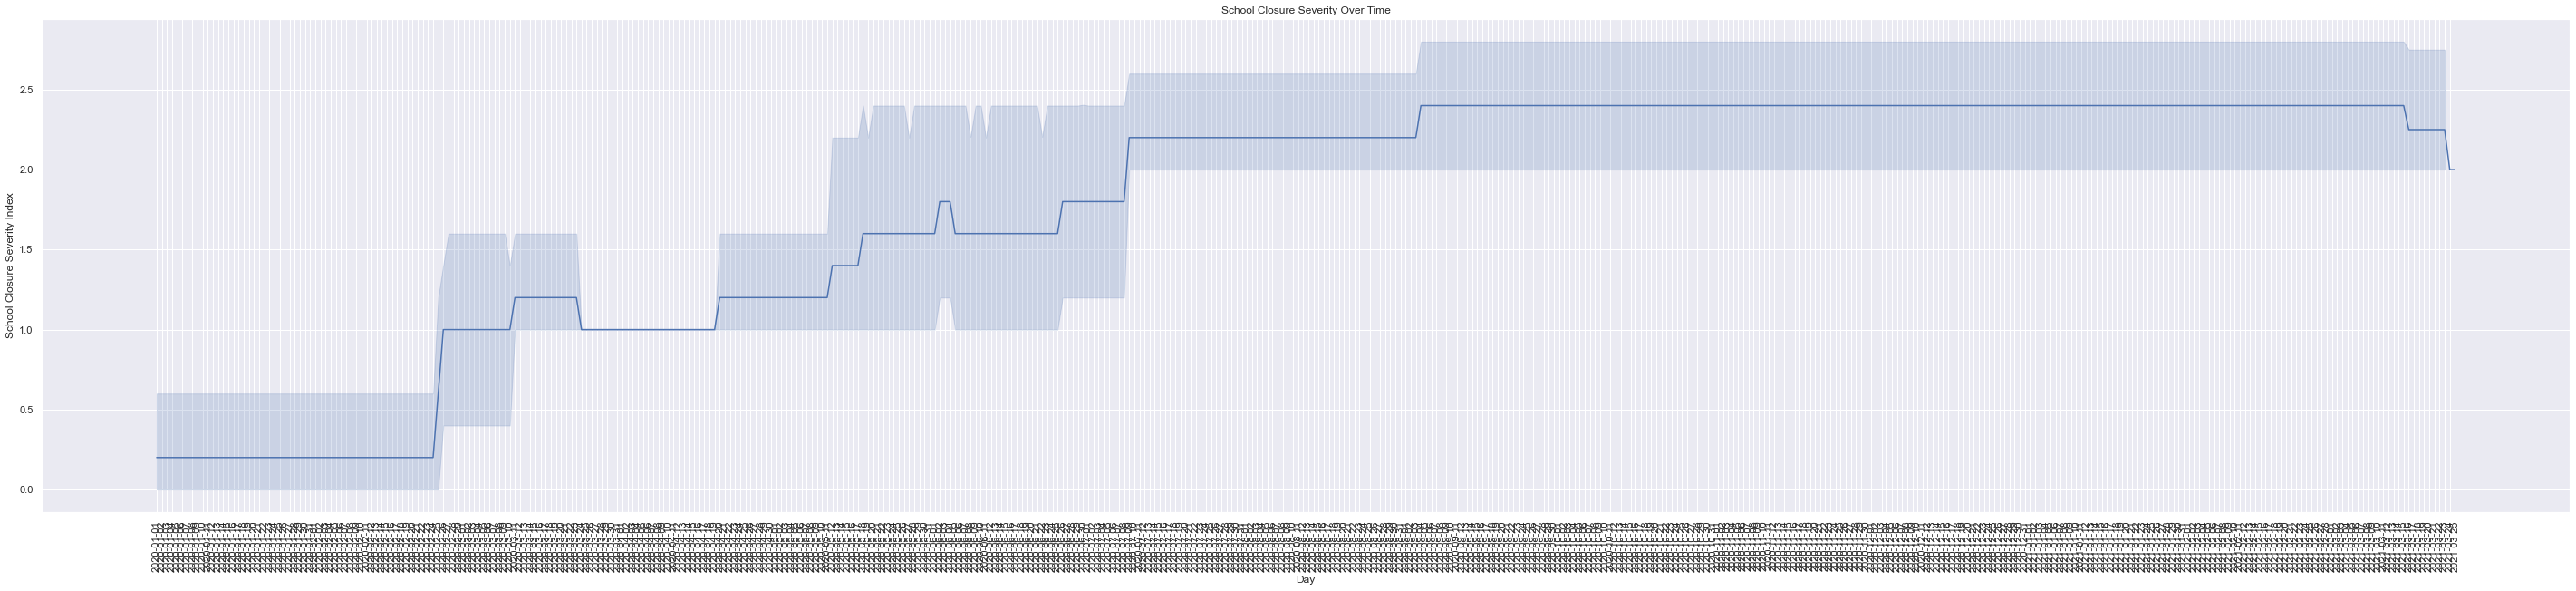

In [28]:
sns.lineplot(x=df_date, y=df_testing)
plt.ylabel('School Closure Severity Index')
plt.xticks(rotation=90)
plt.title('School Closure Severity Over Time')
plt.gcf().set_size_inches(50,10)
sns.set()

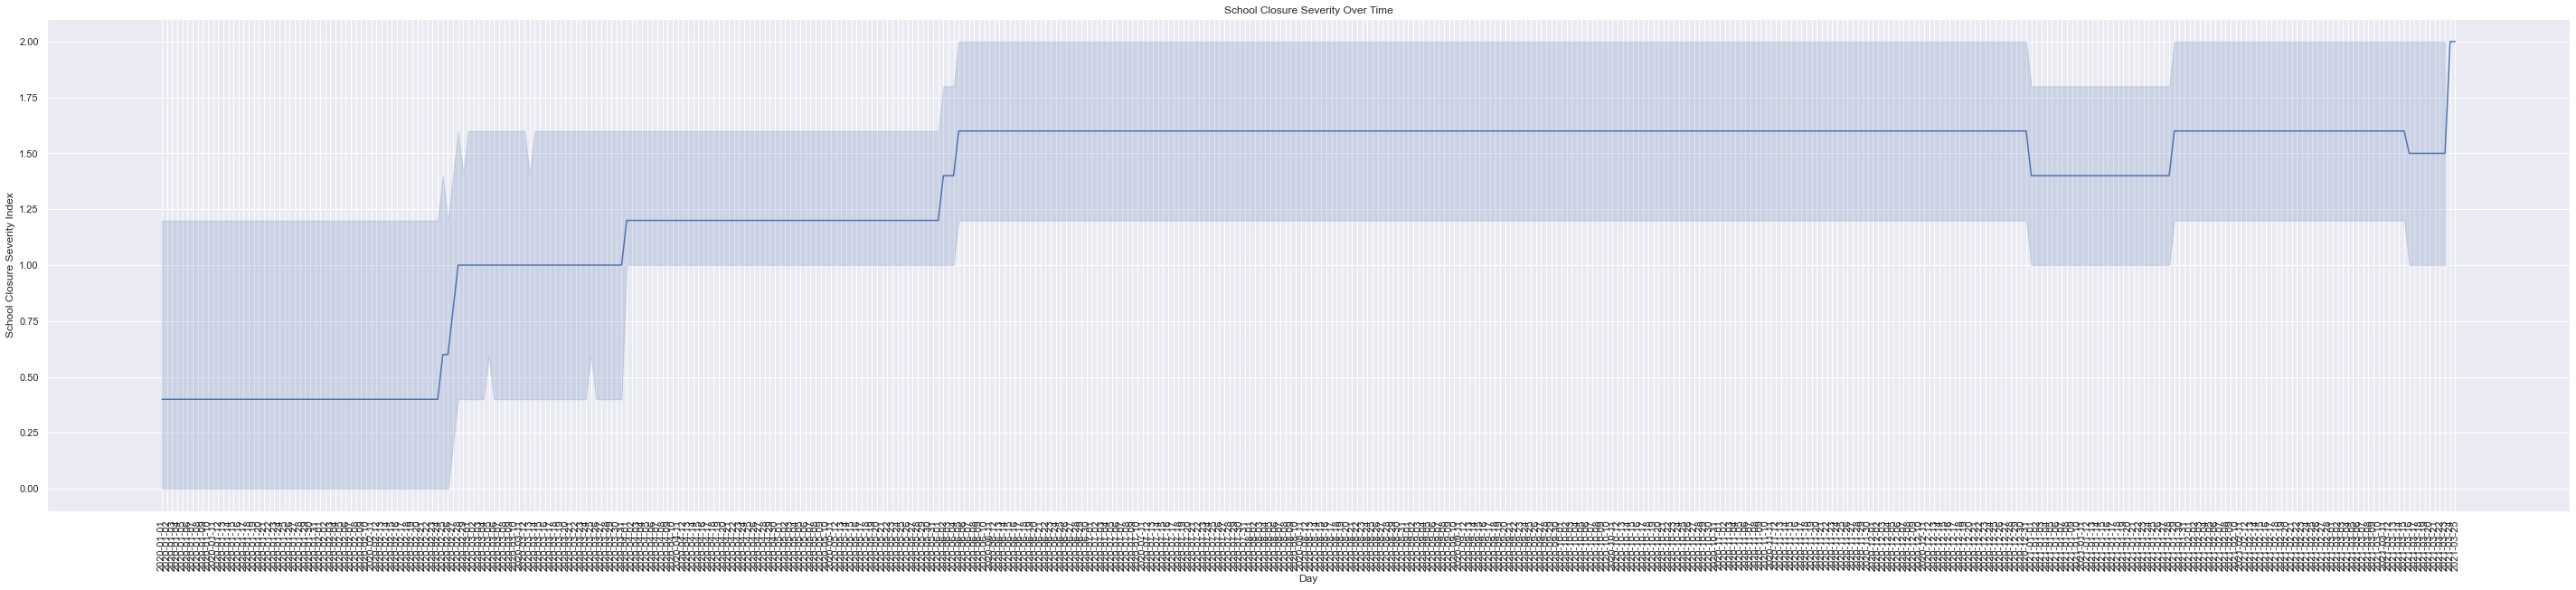

In [27]:
sns.lineplot(x=df_date, y=df_contact)
plt.ylabel('School Closure Severity Index')
plt.xticks(rotation=90)
plt.title('Facial Coverings Severity Over Time')
plt.gcf().set_size_inches(50,10)
sns.set()

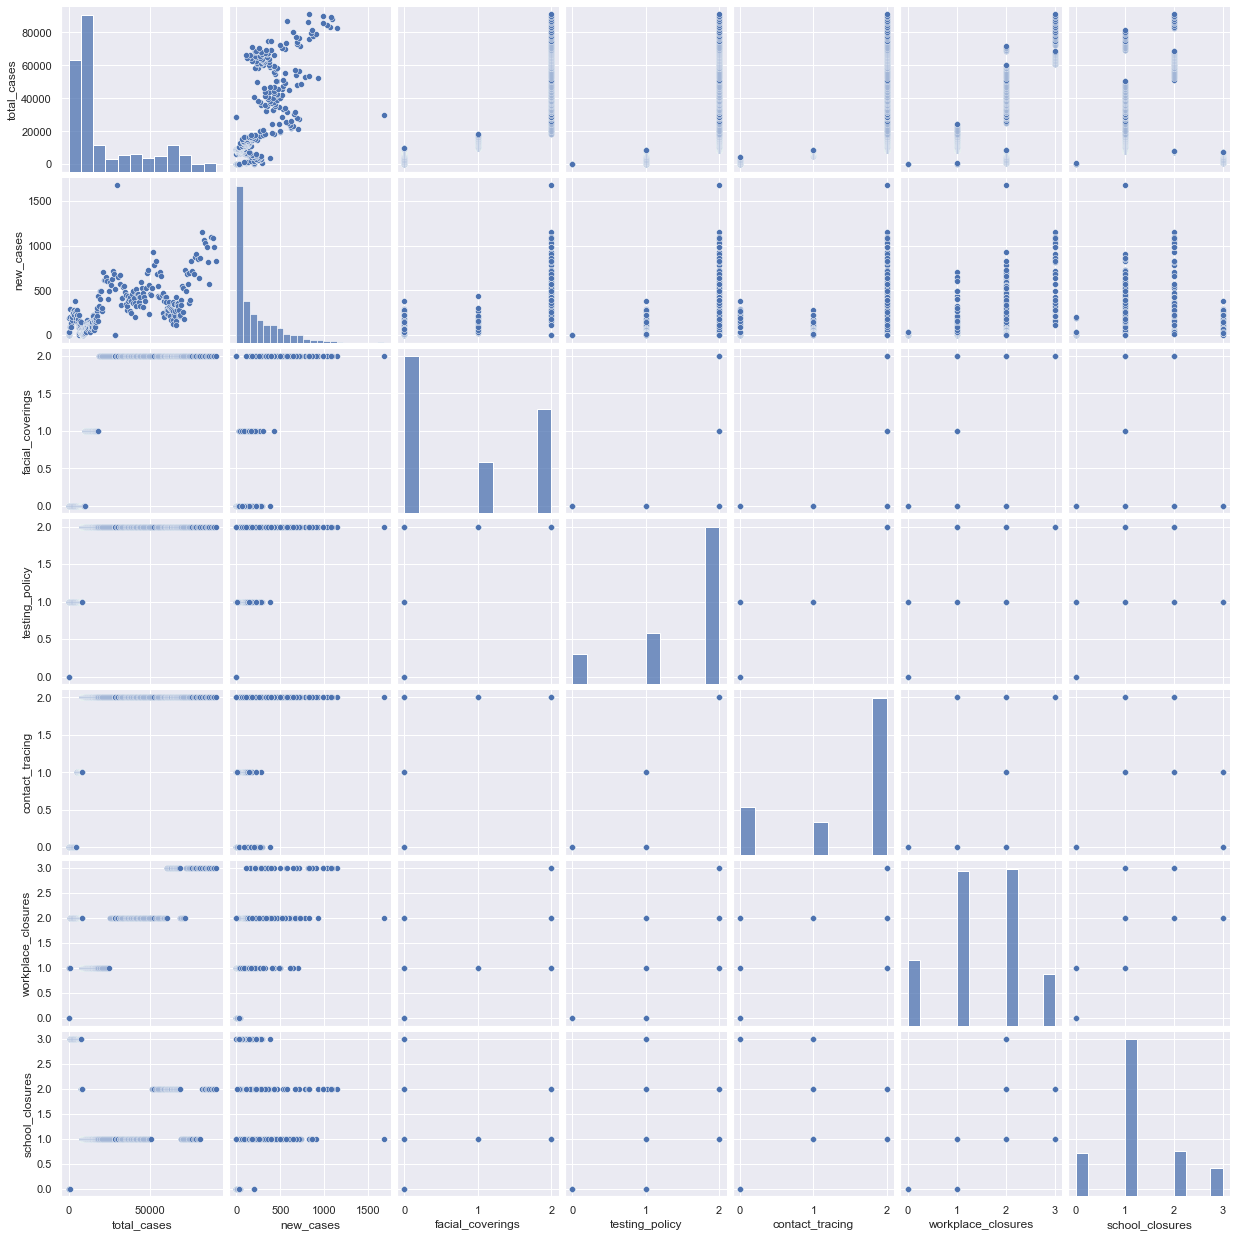

In [9]:
import plotly.express as px
import seaborn as sns

norway = df_eu_covid['Entity'] == 'Norway'
norway_covid_df = df_eu_covid[norway]

sns.pairplot(norway_covid_df)

In [11]:
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,0.000,0.0,0.0,0.000,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77544,ZWE,Africa,Zimbabwe,2021-03-22,36684.0,19.0,25.714,1514.0,2.0,1.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
77545,ZWE,Africa,Zimbabwe,2021-03-23,36717.0,33.0,26.000,1516.0,2.0,1.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
77546,ZWE,Africa,Zimbabwe,2021-03-24,36749.0,32.0,28.143,1516.0,0.0,1.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
77547,ZWE,Africa,Zimbabwe,2021-03-25,36778.0,29.0,23.857,1518.0,2.0,1.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [12]:
slov = data['location'] == 'Slovakia'
nor = data['location'] == 'Norway'
ire = data['location'] == 'Ireland'
den = data['location'] == 'Denmark'
fin = data['location'] == 'Finland'

fin_df = data[fin]
den_df = data[den]
slov_df = data[slov]
nor_df = data[nor]
ire_df = data[ire]

fin_den = pd.concat([fin_df,den_df], ignore_index=True)
slov_fin = pd.concat([fin_den,slov_df], ignore_index=True)
nor_slov = pd.concat([nor_df, slov_fin], ignore_index=True)
eu_data = pd.concat([nor_slov, ire_df], ignore_index=True)

eu_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,NOR,Europe,Norway,2020-02-23,0.0,0.0,0.000,0.0,0.0,0.000,...,64800.057,0.2,114.316,5.31,19.6,20.7,0.0,3.60,82.4,0.957
1,NOR,Europe,Norway,2020-02-24,0.0,0.0,0.000,0.0,0.0,0.000,...,64800.057,0.2,114.316,5.31,19.6,20.7,0.0,3.60,82.4,0.957
2,NOR,Europe,Norway,2020-02-25,0.0,0.0,0.000,0.0,0.0,0.000,...,64800.057,0.2,114.316,5.31,19.6,20.7,0.0,3.60,82.4,0.957
3,NOR,Europe,Norway,2020-02-26,1.0,1.0,0.000,0.0,0.0,0.000,...,64800.057,0.2,114.316,5.31,19.6,20.7,0.0,3.60,82.4,0.957
4,NOR,Europe,Norway,2020-02-27,1.0,0.0,0.000,0.0,0.0,0.000,...,64800.057,0.2,114.316,5.31,19.6,20.7,0.0,3.60,82.4,0.957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,IRL,Europe,Ireland,2021-03-22,231119.0,520.0,543.286,4588.0,1.0,7.714,...,67335.293,0.2,126.459,3.28,23.0,25.7,0.0,2.96,82.3,0.955
2007,IRL,Europe,Ireland,2021-03-23,231484.0,365.0,545.857,4610.0,22.0,8.286,...,67335.293,0.2,126.459,3.28,23.0,25.7,0.0,2.96,82.3,0.955
2008,IRL,Europe,Ireland,2021-03-24,232164.0,680.0,564.143,4628.0,18.0,8.857,...,67335.293,0.2,126.459,3.28,23.0,25.7,0.0,2.96,82.3,0.955
2009,IRL,Europe,Ireland,2021-03-25,232758.0,594.0,566.000,4631.0,3.0,9.286,...,67335.293,0.2,126.459,3.28,23.0,25.7,0.0,2.96,82.3,0.955


In [13]:
fig = px.line(eu_data, x = 'location', y= 'human_development_index')
fig.show()

In [14]:
fig = px.scatter(eu_data, x = 'life_expectancy', y= 'human_development_index', color='location')
fig.show()

In [15]:
fig = px.line(eu_data, x = 'population', y= 'total_cases', color='location')
fig.show()

In [23]:
fig = px.scatter(eu_data, x = 'population', y= 'location', color='location')
fig.show()